In [34]:
import pandas as pd
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt #to plot graphs
import matplotlib.patches as mpatches #to customize legend
import seaborn as sns #to plot graphs
import math 
import re #to find integers & floats in a string 
from collections import Counter #to count values in a dataframe or array
from datetime import date, timedelta, datetime #for the date
import datetime as dt
from sklearn.model_selection import train_test_split

In [2]:
descriptive_analysis=True

In [3]:
# Lecture du fichier des données tests
#----------------------------------------------
PATH = '.' #modifier si besoin le chemin du fichier
pricing_requests = pd.read_csv(PATH + '//pricing_requests_done.csv')

hotels = pd.read_csv('features_hotels.csv', index_col=['hotel_id', 'city'])

pricing_requests.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,request_number
0,105,144,102,amsterdam,39,austrian,1,6056,1
1,880,113,81,amsterdam,39,austrian,1,6056,1
2,588,172,108,amsterdam,39,austrian,1,6056,1
3,352,105,84,amsterdam,39,austrian,1,6056,1
4,925,103,83,amsterdam,39,austrian,1,6056,1


In [4]:
# Assigner le bon type aux variables
#----------------------------------------------
#--- Convert to integer: 
int_list = ["date","avatar_id","hotel_id","stock","request_number"] #"request_number",
pricing_requests[int_list] = pricing_requests[int_list].astype(int) 
#--- Convert to categorical: 
pricing_requests["city"] = pd.Categorical(pricing_requests["city"],ordered=False)
pricing_requests["language"] = pd.Categorical(pricing_requests["language"],ordered=False)
pricing_requests["mobile"] = pd.Categorical(pricing_requests["mobile"],ordered=False)

In [5]:
#obtenir des features en plus correspondant aux features de l'hotel : on fait une jointure 
pricing_requests = pricing_requests.join(hotels, on=['hotel_id', 'city'])
pricing_requests.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,request_number,group,brand,parking,pool,children_policy
0,105,144,102,amsterdam,39,austrian,1,6056,1,Yin Yang,Ardisson,0,0,0
1,880,113,81,amsterdam,39,austrian,1,6056,1,Boss Western,Boss Western,0,0,0
2,588,172,108,amsterdam,39,austrian,1,6056,1,Independant,Independant,0,0,0
3,352,105,84,amsterdam,39,austrian,1,6056,1,Independant,Independant,1,0,0
4,925,103,83,amsterdam,39,austrian,1,6056,1,Boss Western,Boss Western,1,0,0


In [6]:
pricing_requests["group"] = pd.Categorical(pricing_requests["group"],ordered=False)
pricing_requests["brand"] = pd.Categorical(pricing_requests["brand"],ordered=False)
int_list = ["pool", "parking", "children_policy"] #"request_number",
pricing_requests[int_list] = pricing_requests[int_list].astype(int) 

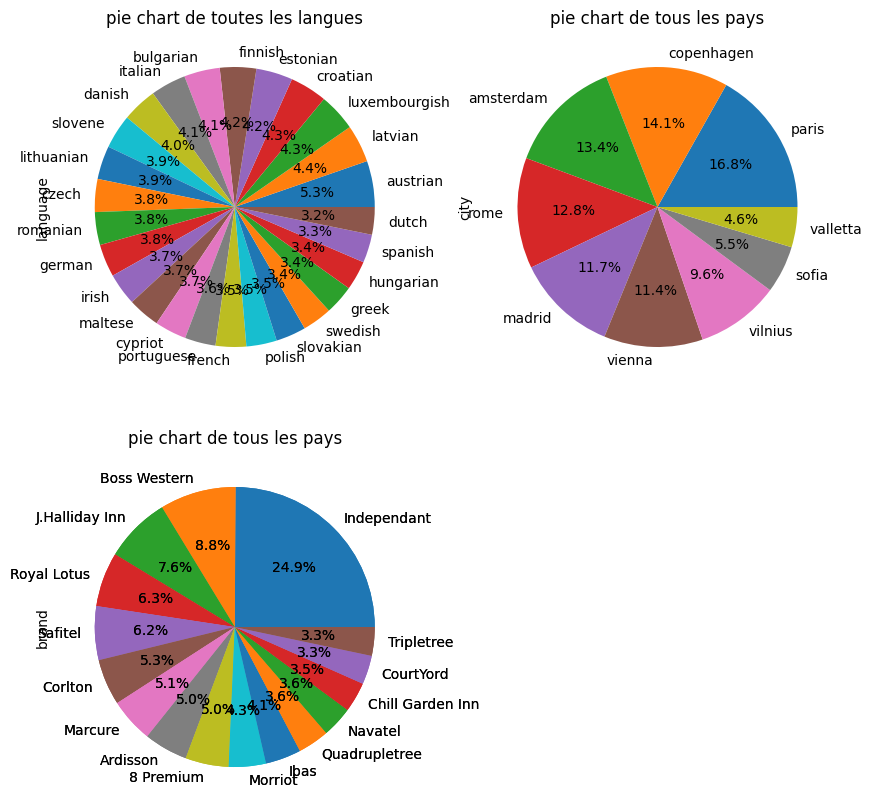

In [7]:
if descriptive_analysis: 
    plt.figure(figsize=(10,10))

    plt.subplot(2,2,1)
    pricing_requests['language'].value_counts().plot.pie( title="pie chart de toutes les langues", autopct='%1.1f%%')

    plt.subplot(2,2,2)
    pricing_requests['city'].value_counts().plot.pie( title="pie chart de tous les pays", autopct='%1.1f%%')


    plt.subplot(2,2,3)
    pricing_requests['brand'].value_counts().plot.pie( title="pie chart de tous les pays", autopct='%1.1f%%')
    plt.subplot(2,2,3)
    pricing_requests['brand'].value_counts().plot.pie( title="pie chart de tous les pays", autopct='%1.1f%%')

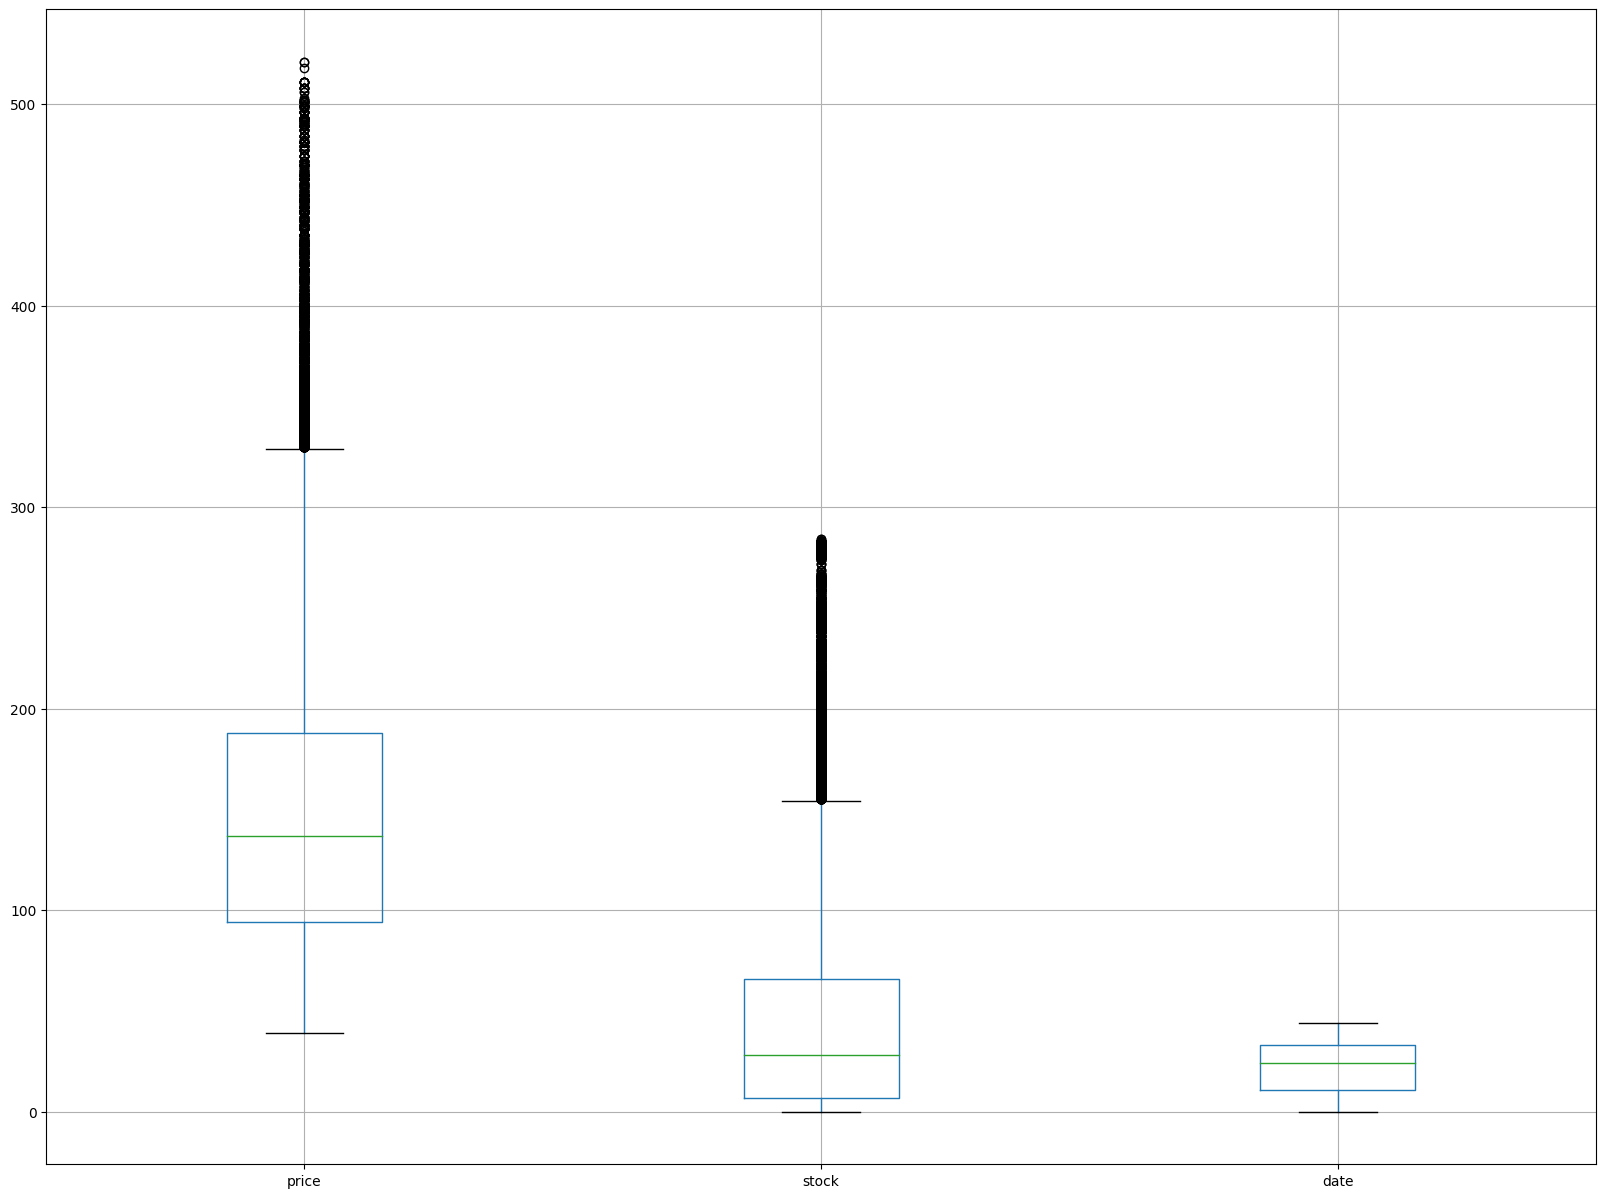

In [25]:
fig2 = plt.figure(figsize=(20, 15))
boxplot = pricing_requests.boxplot(column=["price","stock", "date"])

Text(0.5, 1.0, 'price')

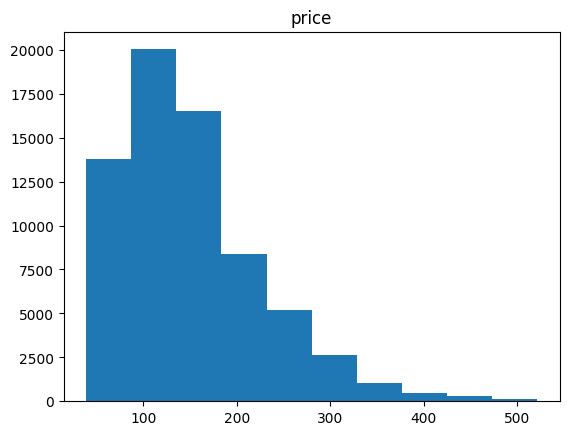

In [26]:
plt.hist(pricing_requests["price"])
plt.title("price")

In [50]:
# Variables explicatives
requests_pricingDum=pd.get_dummies(pricing_requests[["city", "language", "mobile","parking","pool","children_policy"]])
request_pricingQuant=pricing_requests[["hotel_id","stock","request_number", "date"]]
dfC=pd.concat([requests_pricingDum,request_pricingQuant],axis=1)
dfC.columns





Index(['parking', 'pool', 'children_policy', 'city_amsterdam',
       'city_copenhagen', 'city_madrid', 'city_paris', 'city_rome',
       'city_sofia', 'city_valletta', 'city_vienna', 'city_vilnius',
       'language_austrian', 'language_bulgarian', 'language_croatian',
       'language_cypriot', 'language_czech', 'language_danish',
       'language_dutch', 'language_estonian', 'language_finnish',
       'language_french', 'language_german', 'language_greek',
       'language_hungarian', 'language_irish', 'language_italian',
       'language_latvian', 'language_lithuanian', 'language_luxembourgish',
       'language_maltese', 'language_polish', 'language_portuguese',
       'language_romanian', 'language_slovakian', 'language_slovene',
       'language_spanish', 'language_swedish', 'mobile_0', 'mobile_1',
       'hotel_id', 'stock', 'request_number', 'date'],
      dtype='object')

In [51]:
# variable à expliquer
Y_price=pricing_requests["price"]

In [52]:
# construction de l'échantillon d'apprentissage :
X_train,X_test,Y_price_train,Y_price_test=train_test_split(dfC,Y_price,test_size=0.2,random_state=11)#on sélectionne rain_class pour la classification


In [53]:


params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, Y_price_train)
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)

KeyboardInterrupt: 

In [ ]:
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(Y_price_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)

#plt.axvline((np.arange(params["n_estimators"]) + 1)[np.argmin(test_score)])
plt.axvline(200)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance/squared error loss")
fig.tight_layout()
plt.show()

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param=[{"learning_rate":[0.01]}]#optimisation de m
rf= GridSearchCV(GradientBoostingRegressor(n_estimators=200),
        param,cv=5,n_jobs=-1)
boostOpt=rf.fit(X_train, Y_price_train)

# paramètre optimal
print("Error la moins élevée = %f, Meilleur paramètre = %s" % (1. -boostOpt.best_score_,boostOpt.best_params_)) #1-R^2


KeyboardInterrupt: 

In [ ]:
 1-boostOpt.score(X_test, Y_price_test)

In [49]:
X_test.shape

(13709, 60)

In [54]:
from sklearn.ensemble import RandomForestRegressor
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500, 
    max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFitreg = forest.fit(X_train,Y_price_train) 
print("erreur out of bag", 1-rfFitreg.oob_score_) #on calcule l'erreur out of bag. 

/home/lea/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


erreur out of bag 0.06320818972651299


In [57]:
importances = rfFitreg.feature_importances_
indicesreg = np.argsort(importancesreg)[::-1]
for f in range(X_train.shape[1]):
    print(dfC.columns[indicesreg[f]], importances[indicesreg[f]])

hotel_id 0.2251493679520145
pool 0.21793228873237974
stock 0.17925357226958544
date 0.145086132412532
city_copenhagen 0.04109629406701803
city_paris 0.04048390766758251
children_policy 0.03720093624465003
city_vilnius 0.023692656325390048
city_sofia 0.02100757693040342
parking 0.020891456289685185
city_amsterdam 0.007524332888538982
city_madrid 0.007066976922988244
request_number 0.007004578967961765
city_rome 0.0058129988578736
city_vienna 0.005158938964510362
city_valletta 0.0024079856896609157
mobile_1 0.0007701328038858412
language_danish 0.000759652700767628
mobile_0 0.0007563815302782271
language_cypriot 0.0006942012357942084
language_finnish 0.0006560809132224504
language_swedish 0.0006473598012357434
language_latvian 0.0006286308533087638
language_greek 0.0005956562816905306
language_slovene 0.000537077030770226
language_hungarian 0.00048092902355344555
language_austrian 0.0004690109050423865
language_estonian 0.0004649314851594859
language_romanian 0.00045176017629676397
langu

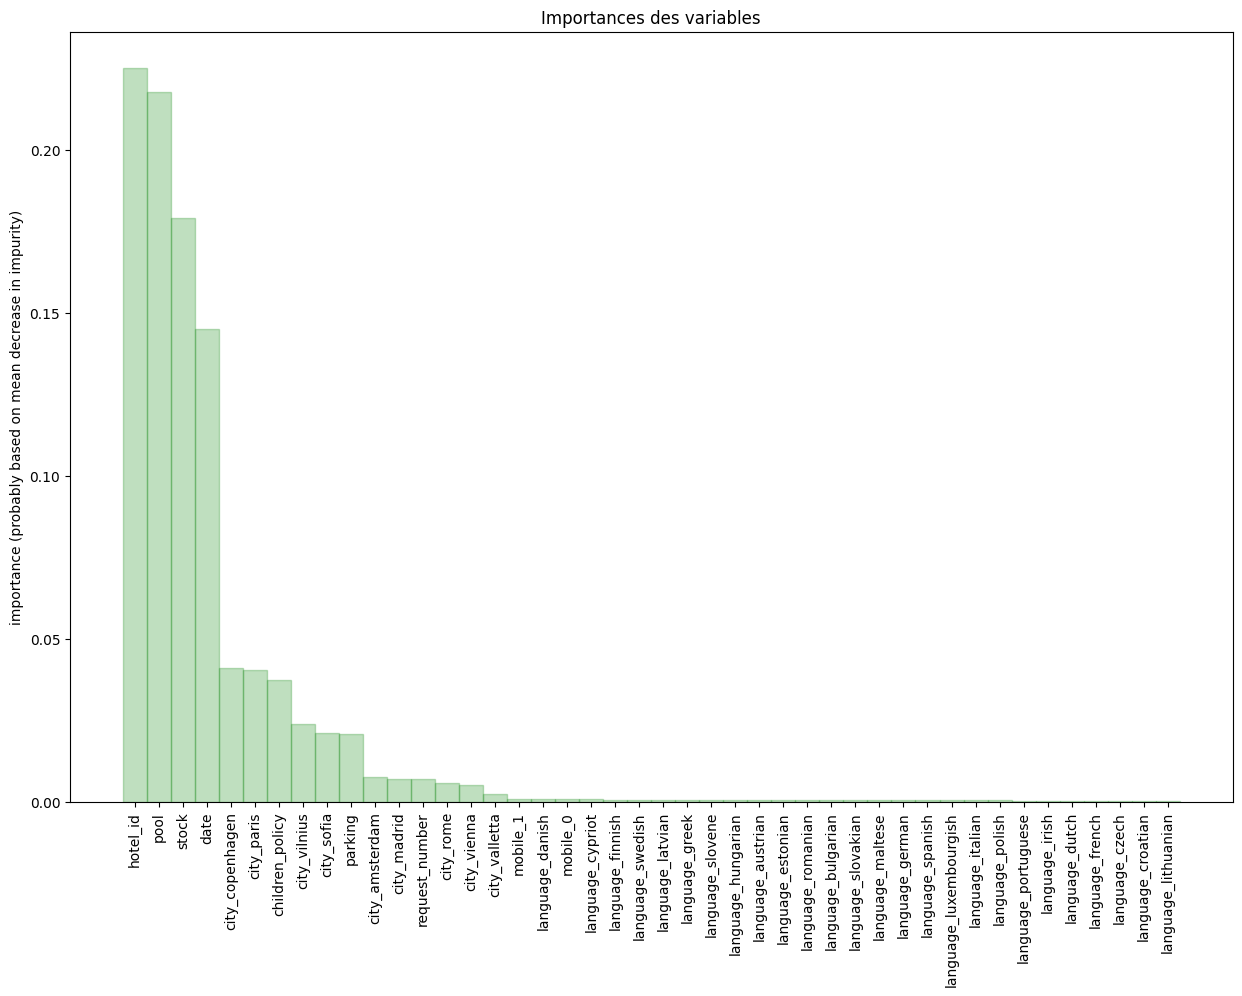

In [58]:


plt.figure(figsize=((15,10)))
plt.bar(list(dfC.columns[indicesreg]), importances[indicesreg],1, color='g', edgecolor="g", alpha=0.25)
plt.title("Importances des variables")
plt.ylabel("importance (probably based on mean decrease in impurity)")
plt.xticks(rotation=90)
plt.show()



In [62]:
 1-rfFitreg.score(X_test,Y_price_test)

0.05679773514931641